In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
shuttle = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\shuttle-unsupervised-ad.csv',header = None)

In [3]:
shuttle

,0,1,2,3,4,5,6,7,8,9
0,108.0,3.0,109.0,0.0,72.0,7.0,1.0,36.0,36.0,o
1,81.0,0.0,84.0,0.0,-14.0,-2.0,4.0,100.0,96.0,o
2,81.0,0.0,84.0,0.0,-20.0,16.0,4.0,105.0,102.0,o
3,76.0,-1.0,81.0,0.0,-42.0,-3.0,5.0,125.0,120.0,o
4,105.0,0.0,107.0,2.0,70.0,0.0,1.0,37.0,36.0,o
...,...,...,...,...,...,...,...,...,...,...
46459,46.0,5.0,78.0,0.0,46.0,5.0,32.0,32.0,0.0,n
46460,37.0,0.0,79.0,-1.0,10.0,3.0,43.0,69.0,26.0,n
46461,48.0,0.0,78.0,3.0,46.0,0.0,30.0,32.0,2.0,n
46462,41.0,0.0,79.0,0.0,38.0,-25.0,38.0,40.0,2.0,n


In [4]:
shuffled_df = shuttle.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [5]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,9
0,0
1,0
2,0
3,0
4,0
...,...
46459,0
46460,0
46461,0
46462,0


In [6]:
accuracies = []
auc_scores = []
for i in range(10):
  iforest = IForest()
  iforest.fit(df)
  iforest_pred = iforest.labels_
  iforest_scores = iforest.decision_scores_
  
  iforest_accuracy = accuracy_score(y,iforest_pred)
  roc_auc = roc_auc_score(y, iforest_scores)

  accuracies.append(iforest_accuracy)
  auc_scores.append(roc_auc)

avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
  
print(avg_accuracy)
print(avg_auc)

0.9183927341597796
0.9971957868913716


In [10]:
iforest = IForest()
iforest.fit(df)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [11]:
iforest_pred = iforest.labels_
iforest_accuracy = accuracy_score(y,iforest_pred)
print(iforest_accuracy)

0.9183238636363636


In [12]:
iforest_scores = iforest.decision_scores_

F1-score: 0.31
0.9973243143925717


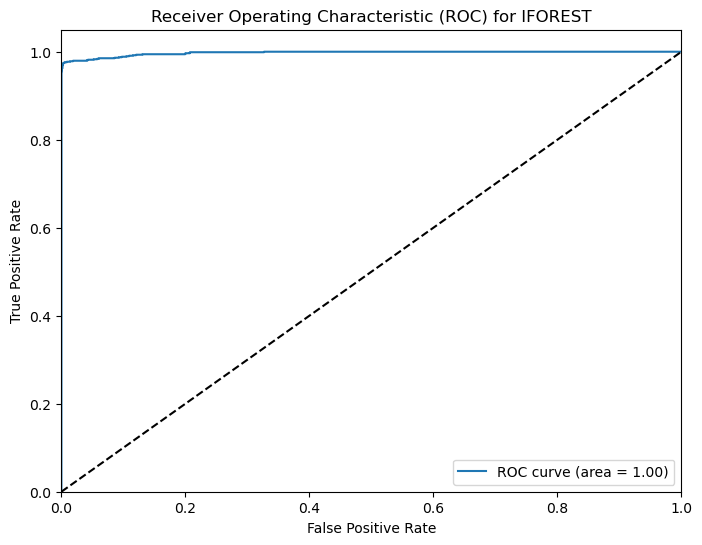

In [13]:
ifor_f1 = f1_score(y, iforest_pred)
print(f"F1-score: {ifor_f1:.2f}")

roc_auc = roc_auc_score(y, iforest_scores)
print(roc_auc)
ifor_fpr, ifor_tpr, _ = roc_curve(y, iforest_scores)

plt.figure(figsize=(8, 6))
plt.plot(ifor_fpr, ifor_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for IFOREST')
plt.legend(loc="lower right")
plt.show()